In [1]:
import pandas as pd
from collections import defaultdict
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

%matplotlib inline
sns.set_style("darkgrid")

In [2]:
path = "../Preprocessed_BreastCancer_Data/Preprocessed_Data_Longer_version/input_csv/type/"
path_y = "../Preprocessed_BreastCancer_Data/Preprocessed_Data_Longer_version/labels_csv/type/"

In [3]:
types = ["DNA_Methylation", "Gene_Expression", "mirNA_Expression"]
fnames = ["/input_met_type_", "/input_gen_type_", "/input_mir_type_"]
genes = ["er", "her2", "pgr"]

In [ ]:
X = defaultdict(dict)
for g in genes:
    for t, f in zip(types, fnames):
        X[g][t] = pd.read_csv("{}{}{}{}.csv".format(path, t, f, g), header=None)

In [5]:
X_scaled = {key1: {key2: pd.DataFrame(scale(val2)) for key2, val2 in val1.items()}
            for key1, val1 in X.items()}

In [7]:
y = dict()
for g in genes:
    y[g] = pd.read_csv("{}label_type_{}.csv".format(path_y, g), header=None)

In [11]:
with open("../data/scaled.pkl", "wb") as all_scaled:
    pkl.dump(X_scaled, all_scaled)

In [6]:
with open("../data/scaled.pkl", "rb") as all_scaled:
    X_scaled = pkl.load(all_scaled)

In [5]:
ind1 = len(X_scaled[gene]["Gene_Expression"].columns)
ind2 = ind1 + len(X_scaled[gene]["DNA_Methylation"].columns)
ind3 = ind2 + len(X_scaled[gene]["mirNA_Expression"].columns)
X_scaled[gene]["DNA_Methylation"].columns = list(range(ind1, ind2))
X_scaled[gene]["mirNA_Expression"].columns = list(range(ind2, ind3))

In [ ]:
X_scaled_comb = pd.concat([X_scaled[gene][key] for key in types], axis=1)

In [ ]:
X_scaled_comb.to_hdf("../data/{}_scaled_all.hdf".format(gene), key="w")

In [4]:
X_scaled_comb = pd.read_hdf("../data/er_scaled_all.hdf")

In [5]:
del X_scaled_comb

In [7]:
X_scaled_comb.head()

,60483,60484,60485,60486,60487,60488,60489,60490,60491,60492,...,88332,88333,88334,88335,88336,88337,88338,88339,88340,88341
0,0.922447,-0.102007,-0.502571,0.080365,0.0,-0.522990,-0.085053,0.850858,0.580444,-2.532972,...,0.0,-0.171126,-0.339715,-0.255112,-0.761893,0.0,-0.356868,-0.193069,0.196899,-0.038987
1,-0.969407,-1.259412,-0.883418,-2.053858,0.0,-0.584711,-0.242774,0.398873,0.452735,-3.127973,...,0.0,0.020610,1.478028,2.109868,-0.523408,0.0,-0.221866,-0.381090,1.589961,-0.002712
2,0.407967,-1.104461,-0.378491,0.673392,0.0,2.083414,1.034327,-0.947826,-0.855263,0.173788,...,0.0,-0.116344,-0.339715,-0.370477,-0.205427,0.0,0.520643,-0.294311,0.487611,1.162006
3,0.840665,-0.212914,-0.373855,0.173605,0.0,3.168269,1.319974,-0.793703,-1.099885,0.702259,...,0.0,-0.308080,-0.339715,-0.370477,-0.364418,0.0,-0.786419,-0.863195,-0.636676,-0.834512
4,0.423447,0.686292,-0.468500,-0.433679,0.0,-0.459612,-0.400338,-0.035959,0.010976,-0.485735,...,0.0,-0.280689,-0.339715,0.379395,0.033058,0.0,-0.596189,0.332426,0.570737,-0.514446


## PCA stuff

In [8]:
pca = PCA(n_components=40)
pcs = {gene: pd.DataFrame(pca.fit_transform(X_scaled[gene]["Gene_Expression"])) for gene in genes}

In [42]:
filt_pcs = {key: val[y[key][0] < 2] for key, val in pcs.items()}

In [46]:
filt_y = {key: val[0][val[0] < 2] for key, val in y.items()}

In [9]:
pca.explained_variance_

array([ 5097.35633648,  3505.89522364,  1632.50074885,  1404.30160244,
        1046.57050149,  1007.03236119,   831.89916969,   761.40017045,
         656.29677589,   563.6844707 ,   537.24492406,   507.97966905,
         469.39440269,   457.47223129,   414.68915586,   399.29081296,
         367.22364917,   353.26566966,   314.86348372,   294.52089638,
         276.74063235,   254.90353563,   250.38406541,   230.48104375,
         223.09962194,   212.90711611,   205.75403466,   202.38008051,
         189.88658692,   187.32671732,   182.62217221,   179.51408029,
         175.89941979,   170.42163178,   166.64827751,   162.29253378,
         159.57515835,   156.53846319,   153.47712225,   151.93877499])

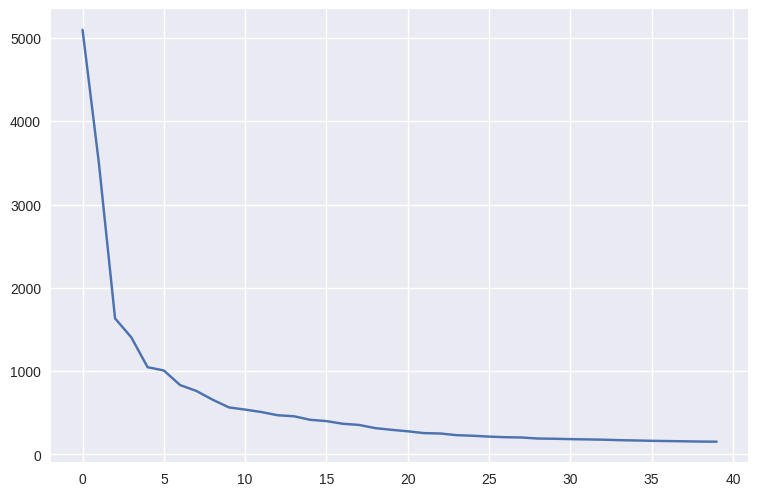

In [10]:
plt.plot(pca.explained_variance_)

## t-SNE stuff

In [57]:
tsne = TSNE()
tsne_dict = {gene: tsne.fit_transform(filt_pcs[gene]) for gene in genes}

In [58]:
tsne_coors = {gene: list(zip(*tsne_dict[gene])) for gene in genes} 

In [59]:
def get_c(num):
    if num == 0:
        return "blue"
    elif num == 1:
        return "red"
    else:
        return "black"

In [73]:
coloring = list(map(get_c, filt_y["er"]))

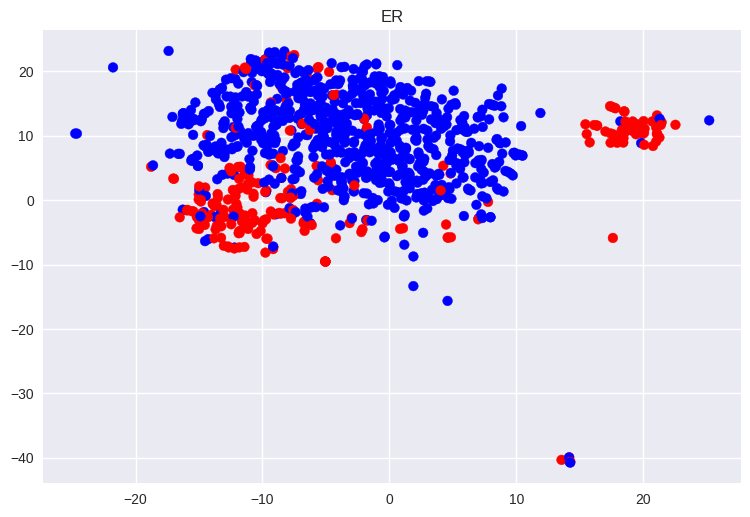

In [74]:
plt.scatter(tsne_coors["er"][0], tsne_coors["er"][1], c=coloring)
plt.title("ER")

In [75]:
coloring = list(map(get_c, filt_y["her2"]))

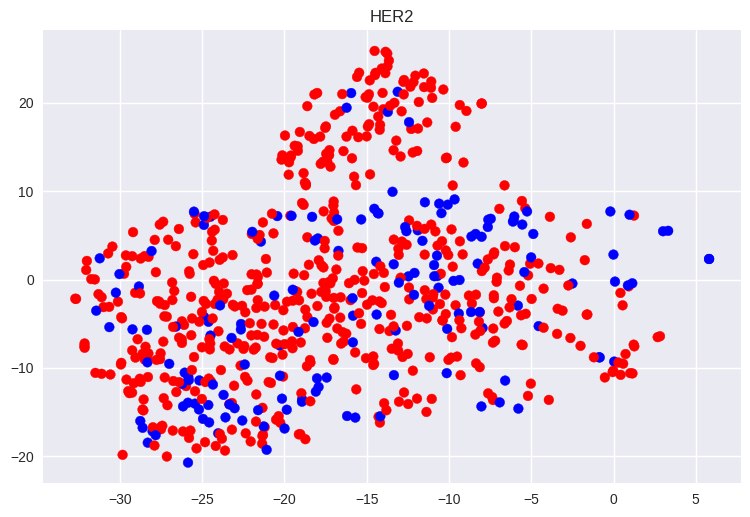

In [76]:
plt.scatter(tsne_coors["her2"][0], tsne_coors["her2"][1], c=coloring)
plt.title("HER2")

In [77]:
coloring = list(map(get_c, filt_y["pgr"]))

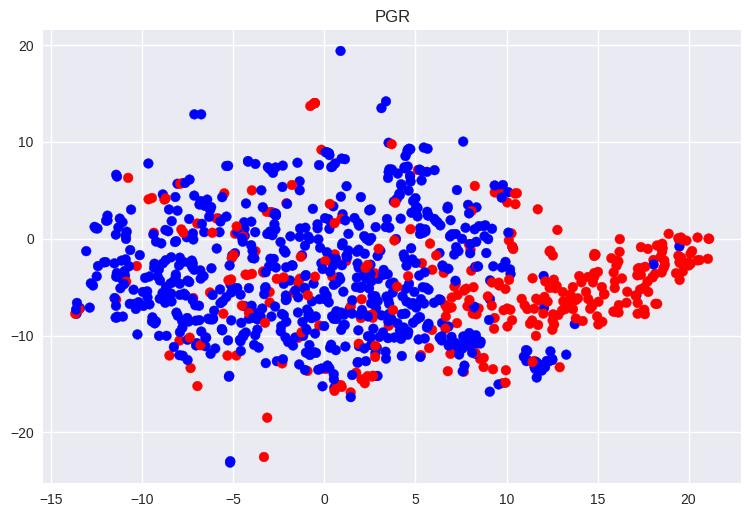

In [78]:
plt.scatter(tsne_coors["pgr"][0], tsne_coors["pgr"][1], c=coloring)
plt.title("PGR")

In [18]:
y["er"][0].unique()

array([0, 1, 2])

## XGBoost

In [11]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, make_scorer
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from random import seed
from numpy import mean

/home/explover/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
seed(1)

In [25]:
fi = clf.feature_importances_

In [100]:
column_ind = fi > 0.01

In [21]:
def train_xgb(gene):
    ind = y[gene][0] < 2
    X_data, y_data = pcs[gene][ind], y[gene][0][ind]
    X_data.index = y_data.index = list(range(len(X_data)))
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.25, random_state=1)
    clf = XGBClassifier()
    model = clf.fit(X_train, y_train)
    fi = clf.feature_importances_
    column_ind = fi > 0.01
    columns = X_data.columns[column_ind]
    X_data = X_data[columns]
    print(len(X_data.columns))
    cvs = cross_val_score(model, X_data, y_data, cv=5, scoring=make_scorer(f1_score))
    print(cvs)
    print(mean(cvs))

In [22]:
train_xgb("er")

33
[ 0.79120879  0.84782609  0.76404494  0.75862069  0.88372093]
0.809084288375


In [23]:
train_xgb("her2")

37
[ 0.8974359   0.88596491  0.87659574  0.89830508  0.89082969]
0.889826266693


In [24]:
train_xgb("pgr")

34
[ 0.72881356  0.8125      0.77966102  0.75        0.74336283]
0.762867481626


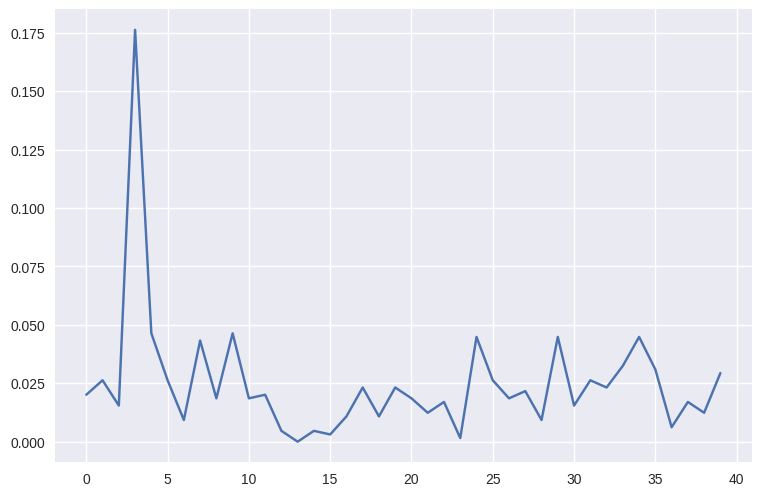

In [30]:
plt.plot(clf.feature_importances_)

In [111]:
mean(cvs)

0.83270581860650739